In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 2011-2018 SEASONS 

In [2]:
df = pd.read_csv('MLB_STATS_2011-2018.csv')

In [3]:
df.head()

,#Bat,#P,25-Man,2B,3B,AB,Avg_Salary,BA,BB9,BB_x,...,Suspended,TB,Tm,Total Payroll,W,WHIP,WP,Year,cSho,tSho
0,51,25,57930520.0,293,37,5421,1.731183e+06,0.250,2.8,531,...,NaN,2240,ARI,65784971.0,94,1.286,39,2011,1,12
1,45,21,98521630.0,244,16,5528,2.321633e+06,0.243,3.2,504,...,NaN,2140,ATL,99830230.0,89,1.252,61,2011,2,16
2,50,27,94391741.0,273,13,5585,1.926362e+06,0.257,3.3,452,...,NaN,2306,BAL,94391741.0,69,1.454,32,2011,1,7
3,49,27,164517590.0,352,35,5710,3.671346e+06,0.280,3.3,578,...,NaN,2631,BOS,172553261.0,90,1.308,58,2011,1,13
4,42,22,124652698.0,285,36,5549,3.486942e+06,0.256,3.6,425,...,NaN,2224,CHC,139477698.0,71,1.408,51,2011,1,5


In [4]:
df.shape

(239, 72)

In [5]:
df.tail()

,#Bat,#P,25-Man,2B,3B,AB,Avg_Salary,BA,BB9,BB_x,...,Suspended,TB,Tm,Total Payroll,W,WHIP,WP,Year,cSho,tSho
234,49,30,113991329.0,248,9,5498,4.549564e+06,0.249,3.7,525,...,0.0,2250,STL,163784311.0,88,1.338,63,2018,1,8
235,54,31,25668988.0,274,43,5475,1.966005e+06,0.258,3.1,540,...,0.0,2225,TBR,68810167.0,90,1.199,55,2018,0,14
236,50,32,96239016.0,266,24,5453,4.017858e+06,0.240,3.1,555,...,0.0,2204,TEX,140625018.0,67,1.403,57,2018,0,5
237,63,36,81293347.0,320,16,5477,4.079626e+06,0.244,3.5,499,...,0.0,2339,TOR,150946147.0,73,1.414,71,2018,0,3
238,53,31,130197979.0,284,25,5517,5.182360e+06,0.254,3.0,631,...,0.0,2309,WSN,181382609.0,82,1.250,42,2018,1,7


In [6]:
df.dtypes

#Bat               int64
#P                 int64
25-Man           float64
2B                 int64
3B                 int64
AB                 int64
Avg_Salary       float64
BA               float64
BB9              float64
BB_x               int64
BB_y               int64
BF                 int64
BK                 int64
BatAge           float64
Buried           float64
CG                 int64
CS                 int64
Disabled List    float64
ER                 int64
ERA              float64
ERA+               int64
FIP              float64
GDP                int64
GF                 int64
GS                 int64
G_x                int64
G_y                int64
H9               float64
HBP_x              int64
HBP_y              int64
                  ...   
OPS+               int64
PA                 int64
PAge             float64
R/G              float64
RA/G             float64
RBI                int64
R_x                int64
R_y                int64
Rank             float64


In [7]:
df.columns

Index(['#Bat', '#P', '25-Man', '2B', '3B', 'AB', 'Avg_Salary', 'BA', 'BB9',
       'BB_x', 'BB_y', 'BF', 'BK', 'BatAge', 'Buried', 'CG', 'CS',
       'Disabled List', 'ER', 'ERA', 'ERA+', 'FIP', 'GDP', 'GF', 'GS', 'G_x',
       'G_y', 'H9', 'HBP_x', 'HBP_y', 'HR9', 'HR_x', 'HR_y', 'H_x', 'H_y',
       'IBB_x', 'IBB_y', 'IP', 'LOB_x', 'LOB_y', 'OBP', 'OPS', 'OPS+', 'PA',
       'PAge', 'R/G', 'RA/G', 'RBI', 'R_x', 'R_y', 'Rank', 'Retained',
       'Roster', 'SB', 'SF', 'SH', 'SLG', 'SO/W', 'SO9', 'SO_x', 'SO_y', 'SV',
       'Suspended', 'TB', 'Tm', 'Total Payroll', 'W', 'WHIP', 'WP', 'Year',
       'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

2018    30
2017    30
2016    30
2015    30
2014    30
2013    30
2012    30
2011    29
Name: Year, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat            -0.288480
#P              -0.247136
25-Man           0.513069
2B               0.317035
3B              -0.089006
AB               0.134088
Avg_Salary       0.306017
BA               0.378658
BB9             -0.481999
BB_x             0.458665
BB_y            -0.453219
BF              -0.588028
BK              -0.206974
BatAge           0.262656
Buried           0.070167
CG               0.228315
CS              -0.175995
Disabled List   -0.106827
ER              -0.721523
ERA             -0.727691
ERA+             0.802283
FIP             -0.612804
GDP              0.080360
GF              -0.213823
GS               0.130083
G_x              0.130083
G_y              0.130083
H9              -0.704778
HBP_x            0.222003
HBP_y           -0.111587
                   ...   
OPS              0.542539
OPS+             0.603916
PA               0.450390
PAge             0.319259
R/G              0.569436
RA/G            -0.740626
RBI              0.568976
R_x         

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

#Bat              0
#P                0
25-Man            0
2B                0
3B                0
AB                0
Avg_Salary        0
BA                0
BB9               0
BB_x              0
BB_y              0
BF                0
BK                0
BatAge            0
Buried           89
CG                0
CS                0
Disabled List    89
ER                0
ERA               0
ERA+              0
FIP               0
GDP               0
GF                0
GS                0
G_x               0
G_y               0
H9                0
HBP_x             0
HBP_y             0
                 ..
OPS+              0
PA                0
PAge              0
R/G               0
RA/G              0
RBI               0
R_x               0
R_y               0
Rank             89
Retained         89
Roster            0
SB                0
SF                0
SH                0
SLG               0
SO/W              0
SO9               0
SO_x              0
SO_y              0


In [12]:
df.columns

Index(['#Bat', '#P', '25-Man', '2B', '3B', 'AB', 'Avg_Salary', 'BA', 'BB9',
       'BB_x', 'BB_y', 'BF', 'BK', 'BatAge', 'Buried', 'CG', 'CS',
       'Disabled List', 'ER', 'ERA', 'ERA+', 'FIP', 'GDP', 'GF', 'GS', 'G_x',
       'G_y', 'H9', 'HBP_x', 'HBP_y', 'HR9', 'HR_x', 'HR_y', 'H_x', 'H_y',
       'IBB_x', 'IBB_y', 'IP', 'LOB_x', 'LOB_y', 'OBP', 'OPS', 'OPS+', 'PA',
       'PAge', 'R/G', 'RA/G', 'RBI', 'R_x', 'R_y', 'Rank', 'Retained',
       'Roster', 'SB', 'SF', 'SH', 'SLG', 'SO/W', 'SO9', 'SO_x', 'SO_y', 'SV',
       'Suspended', 'TB', 'Tm', 'Total Payroll', 'W', 'WHIP', 'WP', 'Year',
       'cSho', 'tSho'],
      dtype='object')

## LINEAR REGRESSION WITH STATSMODEL

In [13]:
# Use 2-5 predictors
#predictors = ['RBI','ERA','25-Man','SV']
#predictors = ['RBI','ERA','25-Man','SLG']
#predictors = ['ERA','25-Man','SLG']
#predictors = ['ERA','25-Man','SLG','HR_x','HR_y']
#predictors = ['ERA','25-Man','SLG','HR_x']
#predictors = ['ERA','SLG']
#predictors = ['ERA','25-Man','SLG','SO_x','SO_y']
#predictors = ['ERA','25-Man','SLG','SO_y','BB_x']
#predictors = ['ERA','25-Man','SV','SLG','SO_y','SO_x','BB_x','OBP']
#predictors = ['ERA','25-Man','SV','SLG','OBP']
predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
#predictors = ['ERA','SLG','25-Man']
X = df[predictors]
Y = df.W # target response variable, Wins

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(191, 6) (191,)
(48, 6) (48,)


In [14]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          1.81e-250
Time:                        14:27:17   Log-Likelihood:                -509.69
No. Observations:                 191   AIC:                             1031.
Df Residuals:                     185   BIC:                             1051.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -13.9027      0.628    -22.154      0.0

In [15]:
resid = results.resid

In [16]:
# Instantiate a LinearRegression object
# Linear Regression using scikit learn
lr = LinearRegression()
model = lr.fit(X_train, y_train)

print("The Trainng Score:")
print(lr.score(X_train,y_train))
print()
print("The Test Score:")
print(lr.score(X_test,y_test))
print()
print(model.coef_)

The Trainng Score:
0.901671415181

The Test Score:
0.871104714085

[ -1.40812449e+01   2.74223591e-08   3.59690140e-01   1.90446653e+02
   1.42875629e+02  -2.96341270e+01]


In [17]:
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)

In [18]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(lr.score(X_test, y_test)))
#mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8711047140847488
Root Mean Squared Error: 4.591116561436217


## CROSS VALIDATION OF MODEL

In [19]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,Y, cv= 5)


In [20]:
# Print the 5-fold cross-validation scores R Squared scores in this case
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.90159898  0.88413934  0.88986214  0.83768135  0.90011013]
Average 5-Fold CV Score: 0.8826783881666159


In [21]:
#errors = np.sum(-cross_val_score(reg,X,Y,scoring='neg_mean_squared_error', cv=5, n_jobs=-1))
errors = (-cross_val_score(reg,X,Y,scoring='mean_squared_error', cv=5, n_jobs=-1))
errors

/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

array([ 13.86070671,  14.84625578,  10.34946962,  19.78702378,  17.15021718])

In [22]:
for er in errors:
    rmse = np.sqrt(er)
    print("Root Mean Squared Error: {}".format(rmse))
    print()

Root Mean Squared Error: 3.7229970066668243

Root Mean Squared Error: 3.853083931043939

Root Mean Squared Error: 3.2170591566997015

Root Mean Squared Error: 4.448260759137985

Root Mean Squared Error: 4.141282069092201



## RESIDUAL ANALYSIS: CHECK FOR NORMAL DISTRIBUTION OF RESIDUALS

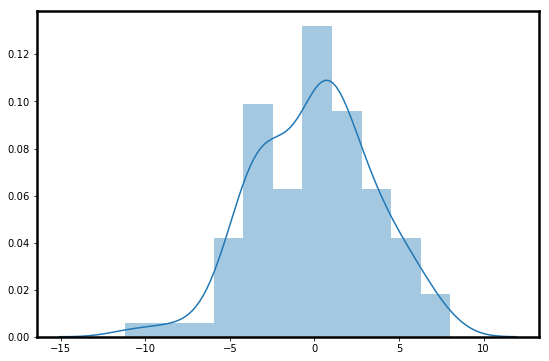

In [23]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.distplot(resid)
plt.figure(figsize = [9,6]) # [width, height]
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)

In [24]:
#standardScalerX = StandardScaler()
#x = standardScalerX.fit_transform(X)

In [25]:
#sns.distplot(df['HR'])

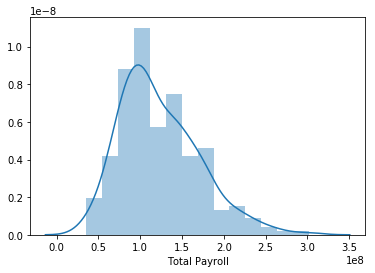

In [26]:
sns.distplot(df['Total Payroll'])

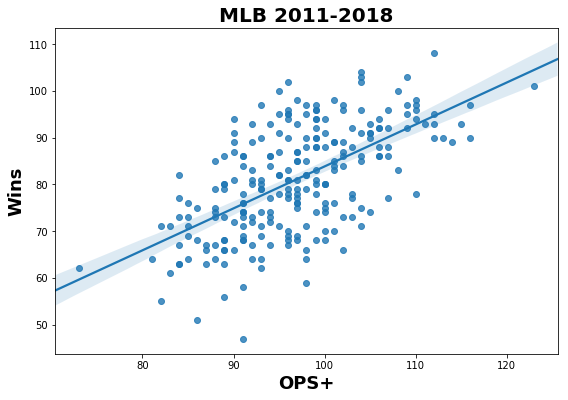

In [27]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 2011-2018',weight = 'bold', size =20)
sns.regplot(x="OPS+", y="W", data = df)
plt.xlabel('OPS+', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

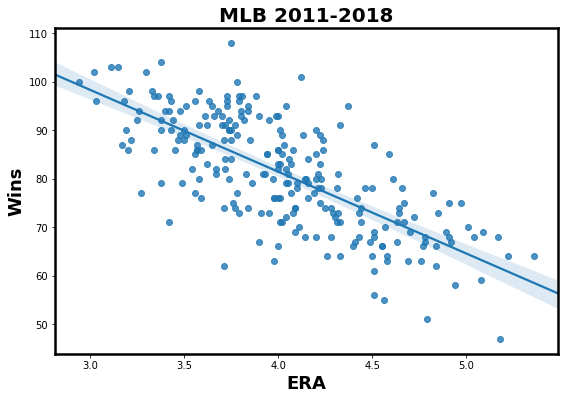

In [28]:
#plt.figure(figsize = [9,6]) # [width, height]
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.title('MLB 2011-2018',weight = 'bold', size =20)
sns.regplot(x="ERA", y="W", data = df)
plt.xlabel('ERA', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

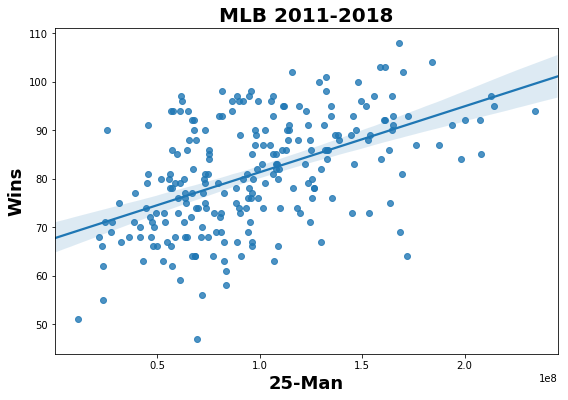

In [29]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 2011-2018',weight = 'bold', size =20)
sns.regplot(x="25-Man", y="W", data = df)
plt.xlabel('25-Man', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

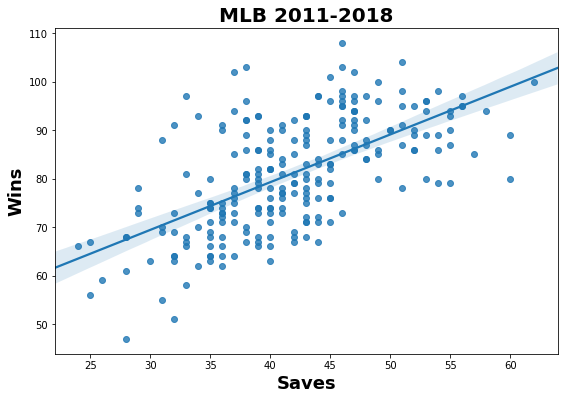

In [30]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 2011-2018',weight = 'bold', size =20)
sns.regplot(x="SV", y="W", data = df)
plt.xlabel('Saves', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

## CHECK FOR COLLINEARITY OF PREDICTORS

### A simple way to detect collinearity is to look at the correlation matrix of the predictors. 
### An element of this matrix that is large in absolute value 
### indicates a pair of highly correlated variables, and therefore a collinearity problem

In [31]:
#df2 = df[[ 'OPS+','RBI','ERA+','25-Man','SV']]
#predictors = ['ERA','25-Man','SV','SLG','OBP','BA']
#df2 = df[[ 'OPS+','RBI','ERA','25-Man','SV','SLG']]
df2 = df[['ERA','25-Man','SV','SLG','OBP','BA']]
df2.head()

,ERA,25-Man,SV,SLG,OBP,BA
0,3.80,57930520.0,58,0.413,0.322,0.250
1,3.48,98521630.0,52,0.387,0.308,0.243
2,4.89,94391741.0,32,0.413,0.316,0.257
3,4.20,164517590.0,36,0.461,0.349,0.280
4,4.33,124652698.0,40,0.401,0.314,0.256


In [32]:
df2.corr()

,ERA,25-Man,SV,SLG,OBP,BA
ERA,1.000000,-0.284428,-0.567735,0.122555,-0.137369,0.041072
25-Man,-0.284428,1.000000,0.248230,0.336750,0.419624,0.358246
SV,-0.567735,0.248230,1.000000,0.074105,0.119942,0.038671
SLG,0.122555,0.336750,0.074105,1.000000,0.732401,0.649018
OBP,-0.137369,0.419624,0.119942,0.732401,1.000000,0.792759
BA,0.041072,0.358246,0.038671,0.649018,0.792759,1.000000


In [33]:
# Based on the above correlation matrix, SV is moderately negatively correlated with ERA
# SLG, OBP & BA are all highly correlated with each other

## TRY OTHER REGRESSION MODELS

In [34]:
predictors = ['ERA','25-Man','SV','SLG']
#predictors = ['ERA','25-Man','SV','OBP']
#predictors = ['ERA','SLG','25-Man']
X = df[predictors]
Y = df.W # target response variable, Wins

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = sm.OLS(y_train, X_train)
results_SLG = model.fit()
print(results_SLG.summary())

(191, 4) (191,)
(48, 4) (48,)
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.634e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          1.08e-236
Time:                        14:27:19   Log-Likelihood:                -554.02
No. Observations:                 191   AIC:                             1116.
Df Residuals:                     187   BIC:                             1129.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -13.3096 

In [35]:
# Create a linear regression object: reg
reg_slg = LinearRegression() # SLG

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_slg,X,Y, cv= 5)

# Print the 5-fold cross-validation scores R Squared scores in this case
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.90678058  0.8601781   0.86941636  0.84145273  0.89464463]
Average 5-Fold CV Score: 0.874494479427329


In [36]:
# fit the model using test data with 'ERA','25-Man','SV','SLG' data
reg_slg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
#predictors = ['ERA','25-Man','SV','SLG']
predictors = ['ERA','25-Man','SV','OBP']
#predictors = ['ERA','SLG','25-Man']
X = df[predictors]
Y = df.W # target response variable, Wins

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = sm.OLS(y_train, X_train)
results_OBP = model.fit()
print(results_OBP.summary())

(191, 4) (191,)
(48, 4) (48,)
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          2.51e-233
Time:                        14:27:19   Log-Likelihood:                -559.98
No. Observations:                 191   AIC:                             1128.
Df Residuals:                     187   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ERA          -11.9059 

In [38]:
# Create a linear regression object: reg
reg_OBP = LinearRegression() # using OBP

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_OBP,X,Y, cv= 5)

# Print the 5-fold cross-validation scores R Squared scores in this case
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.80214926  0.82850297  0.85241331  0.77345986  0.84463002]
Average 5-Fold CV Score: 0.8202310849005416


## PRELIMINARY PREDICTIONS USING 2 MODELS BUILT BY SCI-KIT LEARN

In [39]:
#  fit the model using test data with 'ERA','25-Man','SV','OBP' data
reg_OBP.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
X_test.dtypes

ERA       float64
25-Man    float64
SV          int64
OBP       float64
dtype: object

In [41]:
# imaginary data for Mets
# Need to reshape into 2-D array
# convert to numpy array then use array.reshape(1,-1)
# Note Boston data is for 2018 season where Boston had 108 wins
# Mets data is imaginary data based on some 2019 projections & 2019 salary data
bos_slg = np.array([3.75,167955780,46,.453]) # SLG
bos_obp = np.array([3.75,167955780,46,.339]) # OBP
mets_slg = np.array([2.72,144337876,41,.389]) # SLG
mets_obp = np.array([2.72,144337876,41,.312]) # OBP
mets_slg = mets_slg.reshape(1, -1)
mets_obp = mets_obp.reshape(1, -1)
bos_slg = bos_slg.reshape(1,-1)
bos_obp = bos_obp.reshape(1,-1)

In [42]:
reg_slg.predict(mets_slg)

array([ 94.97463945])

In [43]:
reg_OBP.predict(mets_obp)

array([ 93.08230937])

In [44]:
reg_slg.predict(bos_slg)

array([ 98.76408187])

In [45]:
reg_OBP.predict(bos_obp)

array([ 97.4447999])

 ## SCI-KIT LEARN REGRESSION MODEL 1 USING SLG IS SOMETIMES BETTER THAN MODEL 2  USING OBP AT PREDICTING BOSTON'S 2018 WINS ( PREDICTED 98 WINS, ACTUAL WINS 108) DEPENDING ON HOW THE DATA IS SPLIT

## ANOTHER COMPARISON OF TWO REGRESSION MODELS USING STATSMODELS TRAINED ON ENTIRE DATA SET: PREDICT BOSTON RED SOX 2018 WINS

In [46]:
# statsmodel regression trained using entire dataset 
# with 'ERA','25-Man','SV','OBP' data used to predict Boston Red Sox 2018 Wins
winspred_OBP = results_OBP.predict(bos_obp)
print(winspred_OBP)

[ 95.49537468]


In [47]:
# statsmodel regression trained using entire dataset 
# with 'ERA','25-Man','SV','SLG' data used to predict Boston Red Sox 2018 Wins
winspred_SLG = results_SLG.predict(bos_slg)
print(winspred_SLG)

[ 101.57066465]


## STATSMODELS REGRESSION MODELS, SLG AS A PREDICTOR SEEMS TO GIVE BETTER PREDICTIONS THAN USING OBP AS A PREDICTOR OF WINS